<a href="https://colab.research.google.com/github/Ranakorn/DADS/blob/main/DADS6003/6610412003_Stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [2]:
!pip install cython

In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

--2024-02-20 09:10:50--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 09:10:50--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-20 09:10:50--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [4]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017537 sha256=0637c8635e7ae83b471aed927b43e7c3ca5837cd3280da19897df8ecbf917b1b
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-Lib


In [5]:
# Data Manipulation
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
from pytz import timezone
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [6]:
NVDA = yf.Ticker('NVDA')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
NVDA_price_df = NVDA.history(interval=interval,start=start,end=end)
NVDA_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,148.509995,149.960007,143.070007,143.520004,11605646,0.0,0.0
2023-01-03 10:30:00-05:00,143.529999,143.570007,141.030106,141.960007,7234854,0.0,0.0
2023-01-03 11:30:00-05:00,141.949997,142.610001,140.960007,141.830093,4647010,0.0,0.0
2023-01-03 12:30:00-05:00,141.850006,142.860001,141.570007,142.789993,3367135,0.0,0.0
2023-01-03 13:30:00-05:00,142.800095,142.863098,142.029999,142.271698,3274138,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,4069694,0.0,0.0
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,3787407,0.0,0.0
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,5876346,0.0,0.0


In [7]:
df = NVDA_price_df.iloc[:,:4]
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,148.509995,149.960007,143.070007,143.520004
2023-01-03 10:30:00-05:00,143.529999,143.570007,141.030106,141.960007
2023-01-03 11:30:00-05:00,141.949997,142.610001,140.960007,141.830093
2023-01-03 12:30:00-05:00,141.850006,142.860001,141.570007,142.789993
2023-01-03 13:30:00-05:00,142.800095,142.863098,142.029999,142.271698
...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989


In [8]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [9]:
df

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,144.149994,144.539993,143.190002,143.389893,144.993156,-0.616264,46.748415,0.000000,1.179993
2023-01-05 14:30:00-05:00,143.380005,144.479996,142.800003,142.860001,144.596997,-0.469055,44.516848,-0.009888,-0.769989
2023-01-05 15:30:00-05:00,142.880005,143.070007,142.399994,142.660004,144.139998,0.002840,43.643167,0.020004,-0.500000
2023-01-06 09:30:00-05:00,144.740005,144.889999,140.339996,142.539993,143.839998,0.290795,43.079462,2.080002,1.860001
2023-01-06 10:30:00-05:00,142.539993,146.179993,142.404999,145.949997,143.767998,0.041407,59.567244,0.000000,-2.200012
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,495.057440,-0.116536,39.205214,-0.040009,-10.270020
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,494.877271,-0.054747,50.921030,-0.029999,1.790009
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,495.007730,0.016361,58.456677,0.021698,4.380005


In [10]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,144.149994,144.539993,143.190002,143.389893,144.993156,-0.616264,46.748415,0.000000,1.179993
2023-01-05 14:30:00-05:00,143.380005,144.479996,142.800003,142.860001,144.596997,-0.469055,44.516848,-0.009888,-0.769989
2023-01-05 15:30:00-05:00,142.880005,143.070007,142.399994,142.660004,144.139998,0.002840,43.643167,0.020004,-0.500000
2023-01-06 09:30:00-05:00,144.740005,144.889999,140.339996,142.539993,143.839998,0.290795,43.079462,2.080002,1.860001
2023-01-06 10:30:00-05:00,142.539993,146.179993,142.404999,145.949997,143.767998,0.041407,59.567244,0.000000,-2.200012
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,495.057440,-0.116536,39.205214,-0.040009,-10.270020
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,494.877271,-0.054747,50.921030,-0.029999,1.790009
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,495.007730,0.016361,58.456677,0.021698,4.380005


In [11]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y

array([-1, -1, -1, ..., -1, -1, -1])

In [12]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [13]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

In [14]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.060205008456500404]
1,High,[0.047600753298502864]
2,Low,[0.02842894976438991]
3,Close,[-0.033351489944006295]
4,S_10,[0.017040257679276145]
5,Corr,[-0.014831811627038666]
6,RSI,[0.004803124323715332]
7,Open-Close,[0.005759351694966594]
8,Open-Open,[0.023341528207361628]


In [15]:
probability = model.predict_proba(X_test)
probability

array([[0.4879164 , 0.5120836 ],
       [0.49213415, 0.50786585],
       [0.45976626, 0.54023374],
       ...,
       [0.42683696, 0.57316304],
       [0.45959316, 0.54040684],
       [0.50481664, 0.49518336]])

In [16]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1

In [17]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 57 192]
 [ 40 229]]


In [18]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.59      0.23      0.33       249
           1       0.54      0.85      0.66       269

    accuracy                           0.55       518
   macro avg       0.57      0.54      0.50       518
weighted avg       0.56      0.55      0.50       518



In [19]:
print(model.score(X_test,y_test))

0.5521235521235521


In [20]:
cross_val = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.53179191 0.52601156 0.52601156 0.49710983 0.52906977 0.53488372
 0.45348837 0.54069767 0.55813953 0.52325581]
0.522045973921226


<ipython-input-21-22822932928a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-21-22822932928a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nvidia_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-21-22822932928a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

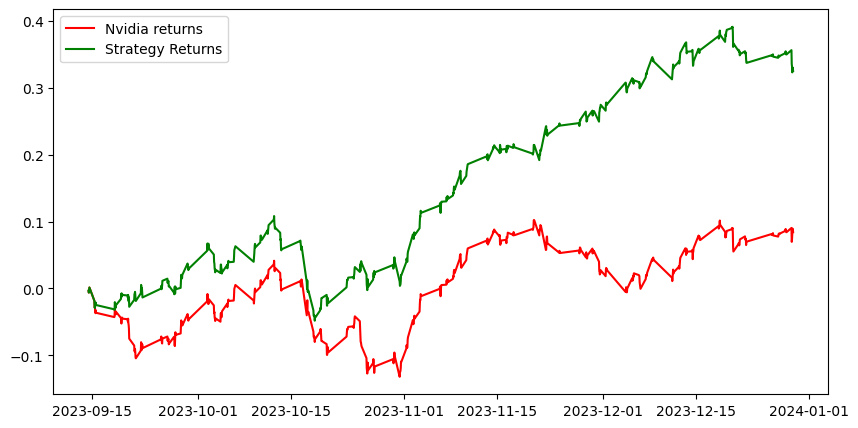

In [21]:
df['Predicted_Signal'] = model.predict(X)
df['Nvidia_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nvidia_returns = np.cumsum(df[split:]['Nvidia_returns'])

df['Startegy_returns'] = df['Nvidia_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nvidia_returns, color='r',label = 'Nvidia returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [22]:
amd = yf.Ticker('AMD')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
amd_price_df = amd.history(interval=interval,start=start,end=end)
amd_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,65.998001,66.879997,64.010002,64.455002,14000117,0.0,0.0
2023-01-03 10:30:00-05:00,64.455002,65.160004,64.059998,64.208000,7041106,0.0,0.0
2023-01-03 11:30:00-05:00,64.209999,64.330002,63.880001,64.095001,4929079,0.0,0.0
2023-01-03 12:30:00-05:00,64.099998,64.385002,63.750000,64.135002,4397283,0.0,0.0
2023-01-03 13:30:00-05:00,64.139999,64.260002,63.799999,63.869999,3343466,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,147.639999,148.500000,147.384995,147.404999,7011789,0.0,0.0
2023-12-29 12:30:00-05:00,147.429504,148.539993,147.360001,148.359894,5710379,0.0,0.0
2023-12-29 13:30:00-05:00,148.350006,148.949997,148.059998,148.085007,5190337,0.0,0.0


In [23]:
df2 = amd_price_df.iloc[:,:4]
df2

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,65.998001,66.879997,64.010002,64.455002
2023-01-03 10:30:00-05:00,64.455002,65.160004,64.059998,64.208000
2023-01-03 11:30:00-05:00,64.209999,64.330002,63.880001,64.095001
2023-01-03 12:30:00-05:00,64.099998,64.385002,63.750000,64.135002
2023-01-03 13:30:00-05:00,64.139999,64.260002,63.799999,63.869999
...,...,...,...,...
2023-12-29 11:30:00-05:00,147.639999,148.500000,147.384995,147.404999
2023-12-29 12:30:00-05:00,147.429504,148.539993,147.360001,148.359894
2023-12-29 13:30:00-05:00,148.350006,148.949997,148.059998,148.085007


In [24]:
df3 = pd.merge(df, df2, how='inner', left_index=True, right_index=True)
df3

,Open_x,High_x,Low_x,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Predicted_Signal,Nvidia_returns,Startegy_returns,Open_y,High_y,Low_y,Close_y
Datetime,,,,,,,,,,,,,,,,
2023-01-05 13:30:00-05:00,144.149994,144.539993,143.190002,143.389893,144.993156,-0.616264,46.748415,0.000000,1.179993,1,NaN,NaN,63.459999,63.680000,63.119999,63.125000
2023-01-05 14:30:00-05:00,143.380005,144.479996,142.800003,142.860001,144.596997,-0.469055,44.516848,-0.009888,-0.769989,1,-0.003702,-0.003702,63.119999,63.427101,62.439999,62.512001
2023-01-05 15:30:00-05:00,142.880005,143.070007,142.399994,142.660004,144.139998,0.002840,43.643167,0.020004,-0.500000,1,-0.001401,-0.001401,62.509998,62.669998,62.299999,62.340000
2023-01-06 09:30:00-05:00,144.740005,144.889999,140.339996,142.539993,143.839998,0.290795,43.079462,2.080002,1.860001,1,-0.000842,-0.000842,63.145000,63.189999,60.049999,60.964500
2023-01-06 10:30:00-05:00,142.539993,146.179993,142.404999,145.949997,143.767998,0.041407,59.567244,0.000000,-2.200012,1,0.023641,0.023641,60.965000,62.035000,60.930000,61.623100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,495.057440,-0.116536,39.205214,-0.040009,-10.270020,-1,0.003640,-0.003640,147.639999,148.500000,147.384995,147.404999
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,494.877271,-0.054747,50.921030,-0.029999,1.790009,1,0.008796,-0.008796,147.429504,148.539993,147.360001,148.359894
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,495.007730,0.016361,58.456677,0.021698,4.380005,1,0.007392,0.007392,148.350006,148.949997,148.059998,148.085007


In [25]:
df3 = pd.merge(df.iloc[:,:4], df2, how='inner', left_index=True, right_index=True)
df3

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y
Datetime,,,,,,,,
2023-01-05 13:30:00-05:00,144.149994,144.539993,143.190002,143.389893,63.459999,63.680000,63.119999,63.125000
2023-01-05 14:30:00-05:00,143.380005,144.479996,142.800003,142.860001,63.119999,63.427101,62.439999,62.512001
2023-01-05 15:30:00-05:00,142.880005,143.070007,142.399994,142.660004,62.509998,62.669998,62.299999,62.340000
2023-01-06 09:30:00-05:00,144.740005,144.889999,140.339996,142.539993,63.145000,63.189999,60.049999,60.964500
2023-01-06 10:30:00-05:00,142.539993,146.179993,142.404999,145.949997,60.965000,62.035000,60.930000,61.623100
...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,147.639999,148.500000,147.384995,147.404999
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,147.429504,148.539993,147.360001,148.359894
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,148.350006,148.949997,148.059998,148.085007


In [26]:
df3['S_10_Y'] = df3['Close_y'].rolling(window=10).mean()
df3['Corr_Y'] = df3['Close_y'].rolling(window=10).corr(df3['S_10_Y'])
df3['RSI_Y'] = ta.RSI(np.array(df3['Close_y']), timeperiod =10)
df3['Open-Close_Y'] = df3['Open_y'] - df3['Close_y'].shift(1)
df3['Open-Open_Y'] = df3['Open_y'] - df3['Close_y'].shift(1)
df3['Open5X-Close5Y'] = df3['Open_x'] - df3['Close_x'].shift(5)
df3['Open5X-Open5Y'] = df3['Open_x'] - df3['Close_x'].shift(5)
x2 = df3.dropna()
x2

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y,S_10_Y,Corr_Y,RSI_Y,Open-Close_Y,Open-Open_Y,Open5X-Close5Y,Open5X-Open5Y
Datetime,,,,,,,,,,,,,,,
2023-01-10 10:30:00-05:00,157.375000,157.994995,155.626007,157.050003,67.199997,67.730003,66.570000,67.510002,67.779300,0.166155,62.097122,0.009499,0.009499,-2.835007,-2.835007
2023-01-10 11:30:00-05:00,157.059998,157.479996,156.320007,156.600006,67.510002,67.669998,67.169998,67.495003,68.131800,-0.819017,61.933408,0.000000,0.000000,-2.622803,-2.622803
2023-01-10 12:30:00-05:00,156.599899,157.322098,156.130096,156.399994,67.509903,67.820000,67.360001,67.570000,68.026800,-0.861399,62.482910,0.014900,0.014900,-0.880096,-0.880096
2023-01-10 13:30:00-05:00,156.399796,158.059998,156.259995,158.000000,67.559998,68.120003,67.495003,68.089996,67.954779,-0.799320,66.237590,-0.010002,-0.010002,0.029800,0.029800
2023-01-10 14:30:00-05:00,158.000000,158.660004,157.539993,158.070007,68.080002,68.150002,67.650002,67.879997,67.866279,-0.746632,63.390869,-0.009995,-0.009995,0.607697,0.607697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,488.079987,491.470001,487.899994,489.899994,147.639999,148.500000,147.384995,147.404999,149.077647,-0.344376,52.881356,-0.001495,-0.001495,-8.180420,-8.180420
2023-12-29 12:30:00-05:00,489.869995,494.420013,489.686798,494.228302,147.429504,148.539993,147.360001,148.359894,148.994637,-0.439373,58.029424,0.024506,0.024506,-5.373596,-5.373596
2023-12-29 13:30:00-05:00,494.250000,499.230011,494.119995,497.894989,148.350006,148.949997,148.059998,148.085007,148.883138,-0.542564,56.069957,-0.009888,-0.009888,-0.950012,-0.950012


In [27]:
y2 = np.where(x2['Close_x'].shift(-1) > x2['Close_x'],1,-1)
y2.shape

(1706,)

In [28]:
split = int(0.7*len(df))
X_train2, X_test2, y_train2, y_test2 = x2[:split], x2[split:], y2[:split], y2[split:]

In [29]:
model2 = LogisticRegression(max_iter=1000)
model2 = model2.fit (X_train2,y_train2)

In [30]:
pd.DataFrame(zip(x2.columns, np.transpose(model2.coef_)))

,0,1
0,Open_x,[-0.04335634947183474]
1,High_x,[0.06486343423119688]
2,Low_x,[-0.02260748930024083]
3,Close_x,[-0.0010451095096473324]
4,Open_y,[-0.03164812460051458]
5,High_y,[-0.1067978713323697]
6,Low_y,[0.1676910456316573]
7,Close_y,[-0.05251132814782924]
8,S_10_Y,[0.03157883547046828]
9,Corr_Y,[-0.012667916658132983]


In [31]:
probability2 = model2.predict_proba(X_test2)
probability2

array([[0.53974625, 0.46025375],
       [0.51914664, 0.48085336],
       [0.51682224, 0.48317776],
       [0.49768354, 0.50231646],
       [0.48443531, 0.51556469],
       [0.49627748, 0.50372252],
       [0.50005622, 0.49994378],
       [0.49068024, 0.50931976],
       [0.50135508, 0.49864492],
       [0.50008906, 0.49991094],
       [0.50618357, 0.49381643],
       [0.51082146, 0.48917854],
       [0.49777962, 0.50222038],
       [0.49115647, 0.50884353],
       [0.50435962, 0.49564038],
       [0.49964572, 0.50035428],
       [0.48261293, 0.51738707],
       [0.4888256 , 0.5111744 ],
       [0.49669658, 0.50330342],
       [0.48363522, 0.51636478],
       [0.46243761, 0.53756239],
       [0.47368128, 0.52631872],
       [0.44538768, 0.55461232],
       [0.51513324, 0.48486676],
       [0.4993797 , 0.5006203 ],
       [0.50912077, 0.49087923],
       [0.46180363, 0.53819637],
       [0.50644358, 0.49355642],
       [0.41212549, 0.58787451],
       [0.49577022, 0.50422978],
       [0.

In [32]:
predicted2 = model2.predict(X_test2)
predicted2

array([-1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [33]:
print(metrics.confusion_matrix(y_test2, predicted2))

[[100 138]
 [109 153]]


In [34]:
print(metrics.classification_report(y_test2, predicted2))

              precision    recall  f1-score   support

          -1       0.48      0.42      0.45       238
           1       0.53      0.58      0.55       262

    accuracy                           0.51       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.50      0.51      0.50       500



In [35]:
print(model2.score(X_test2,y_test2))

0.506


In [38]:
cross_val2 = cross_val_score(model2, x2, y2, scoring='accuracy', cv=10)
print(cross_val2)
print(cross_val2.mean())

[0.53216374 0.50877193 0.52631579 0.50292398 0.55555556 0.5497076
 0.51764706 0.55294118 0.52941176 0.49411765]
0.5269556243550052


<ipython-input-39-31c7d801475c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-39-31c7d801475c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nvidia_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-39-31c7d801475c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

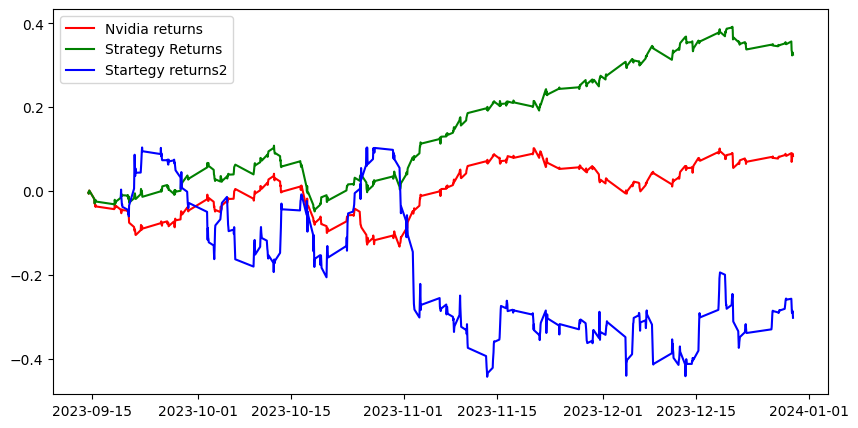

In [39]:
df['Predicted_Signal'] = model.predict(X)
df['Nvidia_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nvidia_returns = np.cumsum(df[split:]['Nvidia_returns'])

df['Startegy_returns'] = df['Nvidia_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

x2['Predicted_Signal2'] = model2.predict(x2)
x2['Nvidia_returns2'] = np.log(x2['Close_x']/x2['Close_x'].shift(5))
x2['Startegy_returns2'] = x2['Nvidia_returns2']* x2['Predicted_Signal2'].shift(5)
Cumulative_Strategy2_returns = np.cumsum(x2[split:]['Startegy_returns2'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nvidia_returns, color='r',label = 'Nvidia returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy2_returns, color='b', label = 'Startegy returns2')
plt.legend()
plt.show()